#**Unsupervised Learning:AllLife Bank Customer Segmentation**

## Importing necessary libraries

In [1]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
mlxtend 0.23.3 requires scikit-learn

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
df = pd.read_excel('/content/Credit+Card+Customer+Data.xlsx')
print(df.head())

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  


### Checking the shape of the dataset

In [4]:
df.shape

(660, 7)

### Displaying few rows of the dataset

In [5]:
# let's view a sample of the data
df.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


### Checking the data types of the columns for the dataset

In [6]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


### Creating a copy of original data

In [7]:
# copying the data to another variable to avoid any changes to original data
data = df.copy()

### Checking for duplicates and missing values

In [8]:
# Checking for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")
# Checking for missing values
print(f"Number of missing values:\n{data.isnull().sum()}")

Number of duplicate rows: 0
Number of missing values:
Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


### Statistical summary of the dataset

In [9]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


## Exploratory Data Analysis

### Univariate analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Customer Key


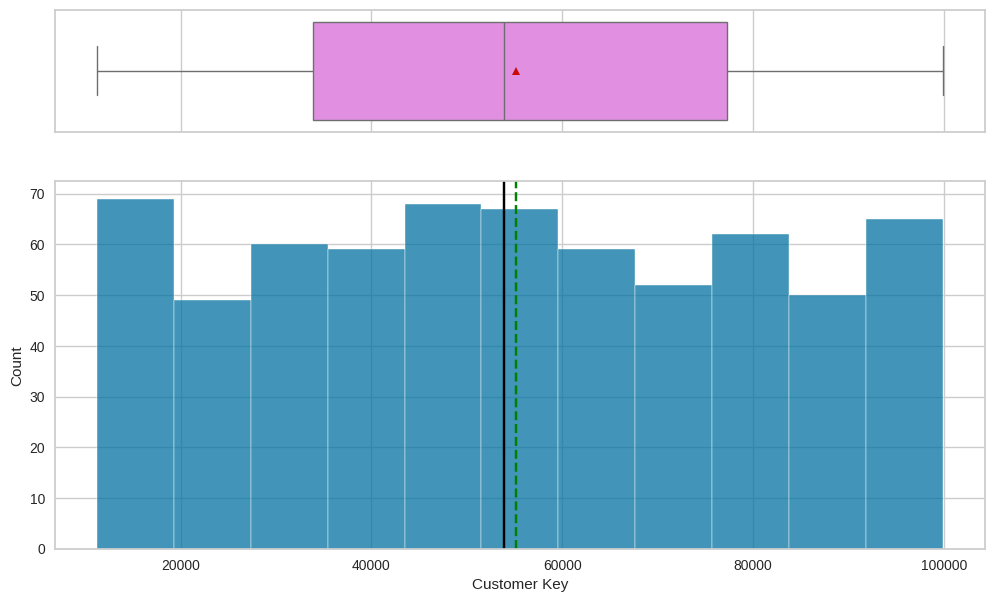

In [12]:
histogram_boxplot(data, 'Customer Key')

Avg_Credit_Limit


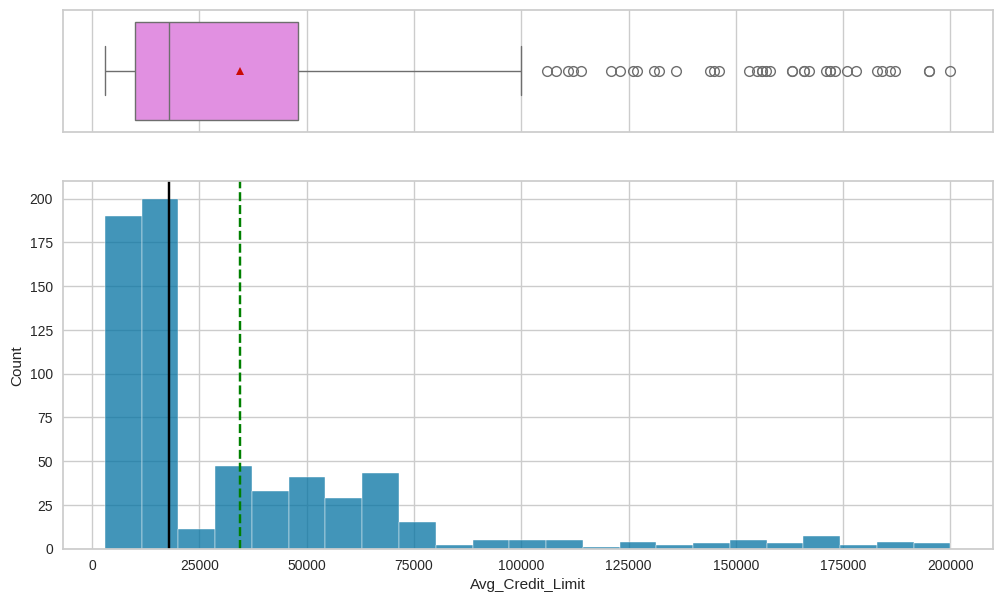

In [13]:
histogram_boxplot(data, 'Avg_Credit_Limit')

Total_Credit_Cards


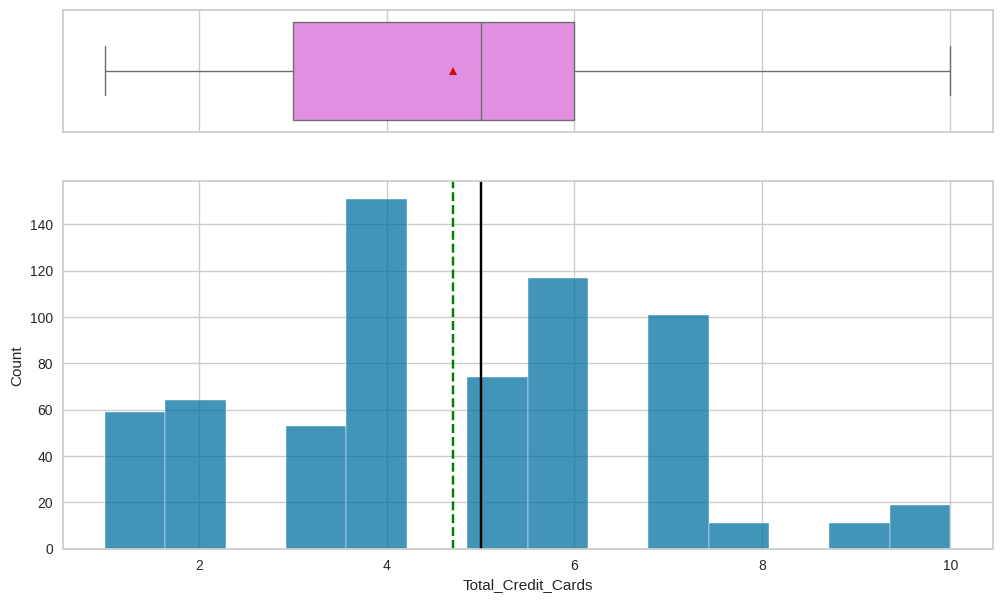

In [14]:
histogram_boxplot(data, 'Total_Credit_Cards')

Total_visits_bank


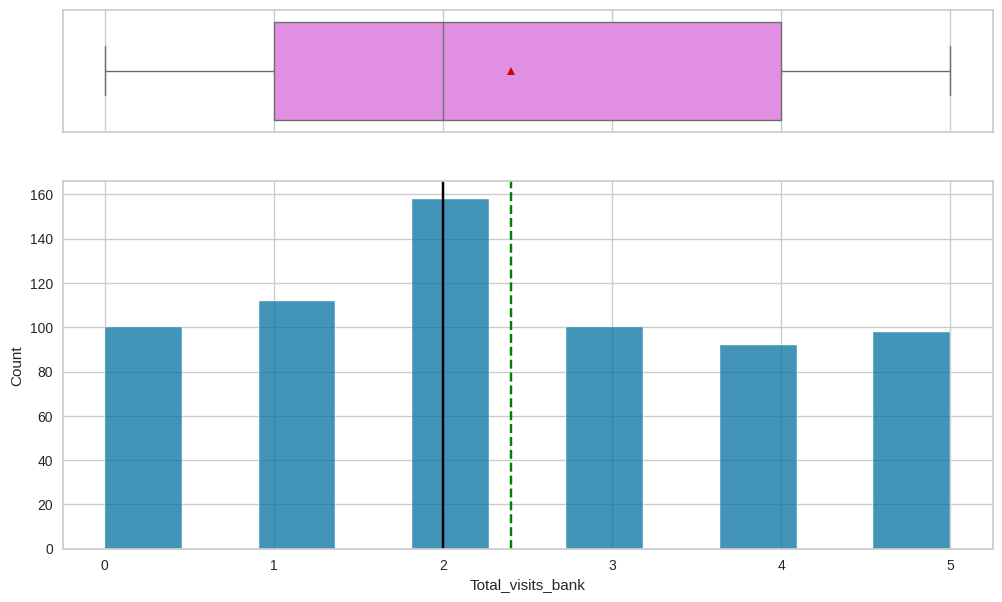

In [15]:
histogram_boxplot(data, 'Total_visits_bank')

Total_visits_online


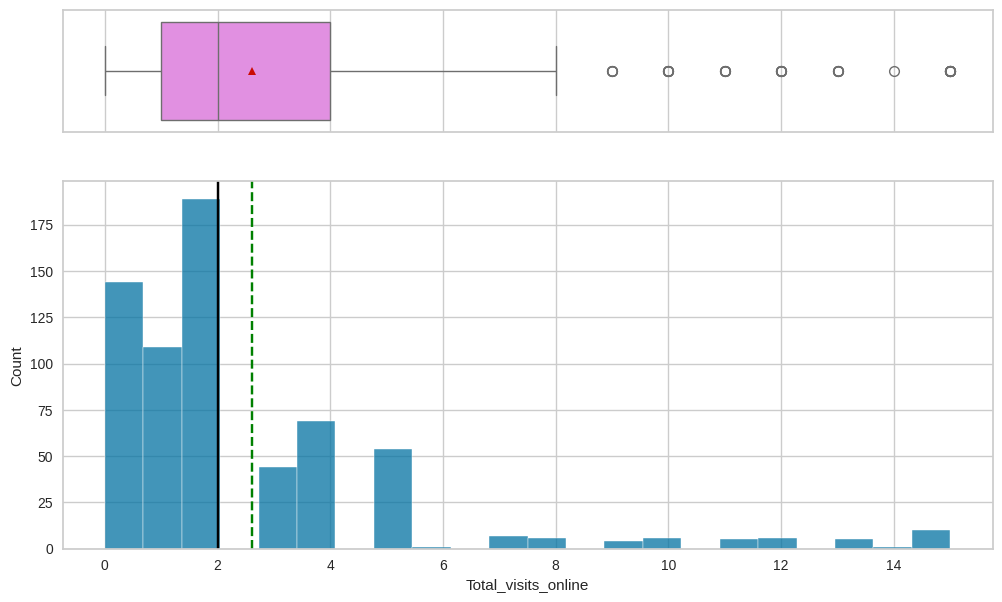

In [16]:
histogram_boxplot(data, 'Total_visits_online')

Total_calls_made

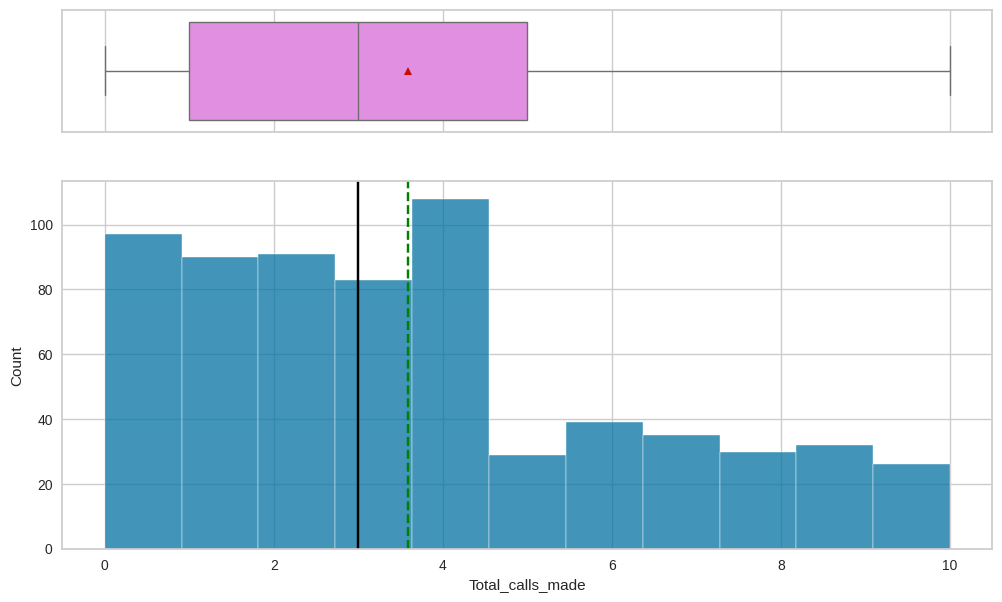

In [17]:
histogram_boxplot(data, 'Total_calls_made')

### Bivariate Analysis

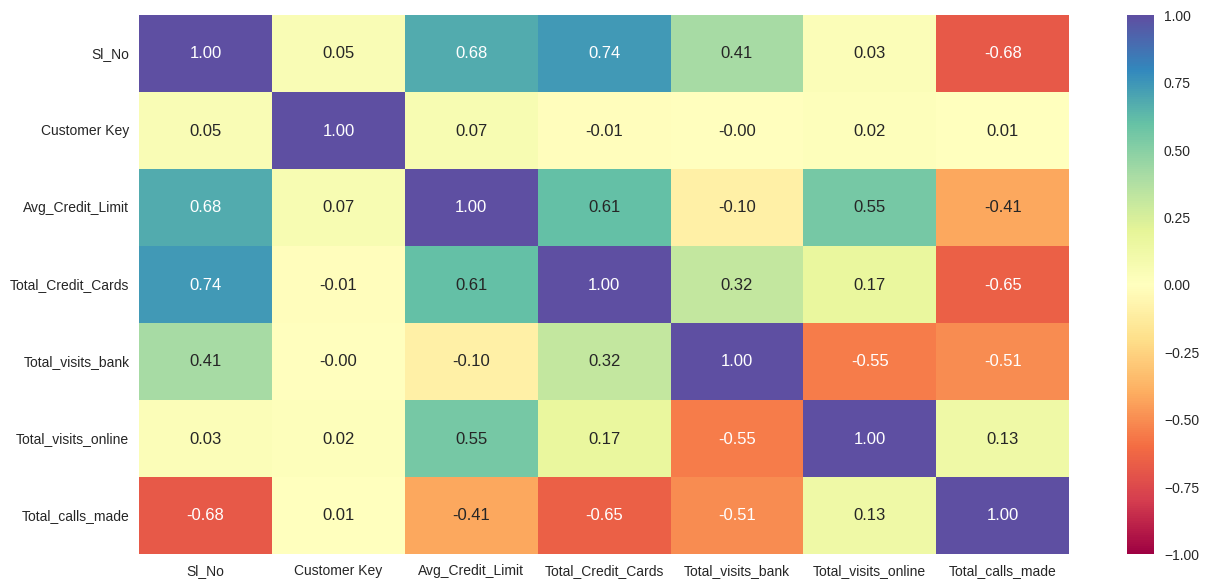

In [18]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

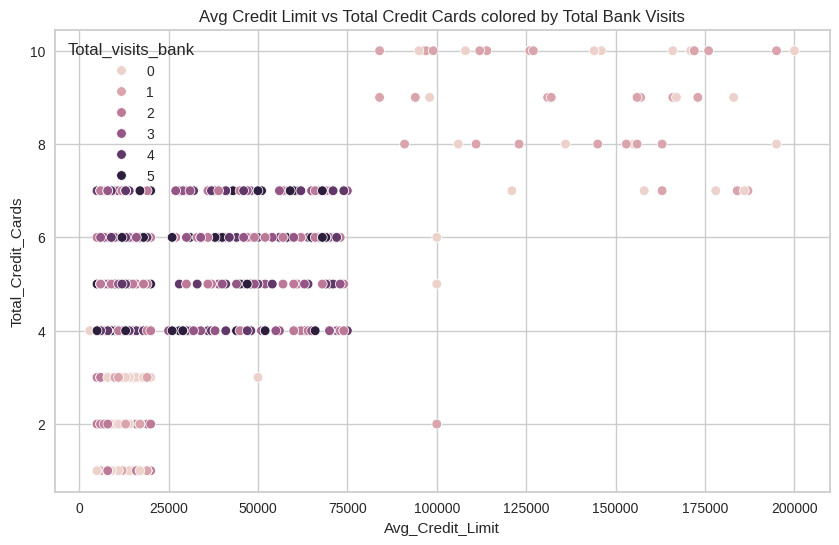

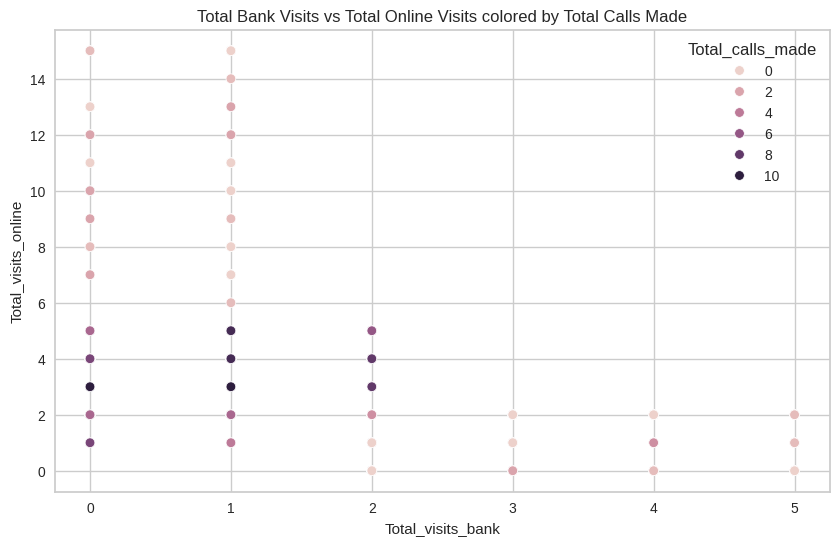

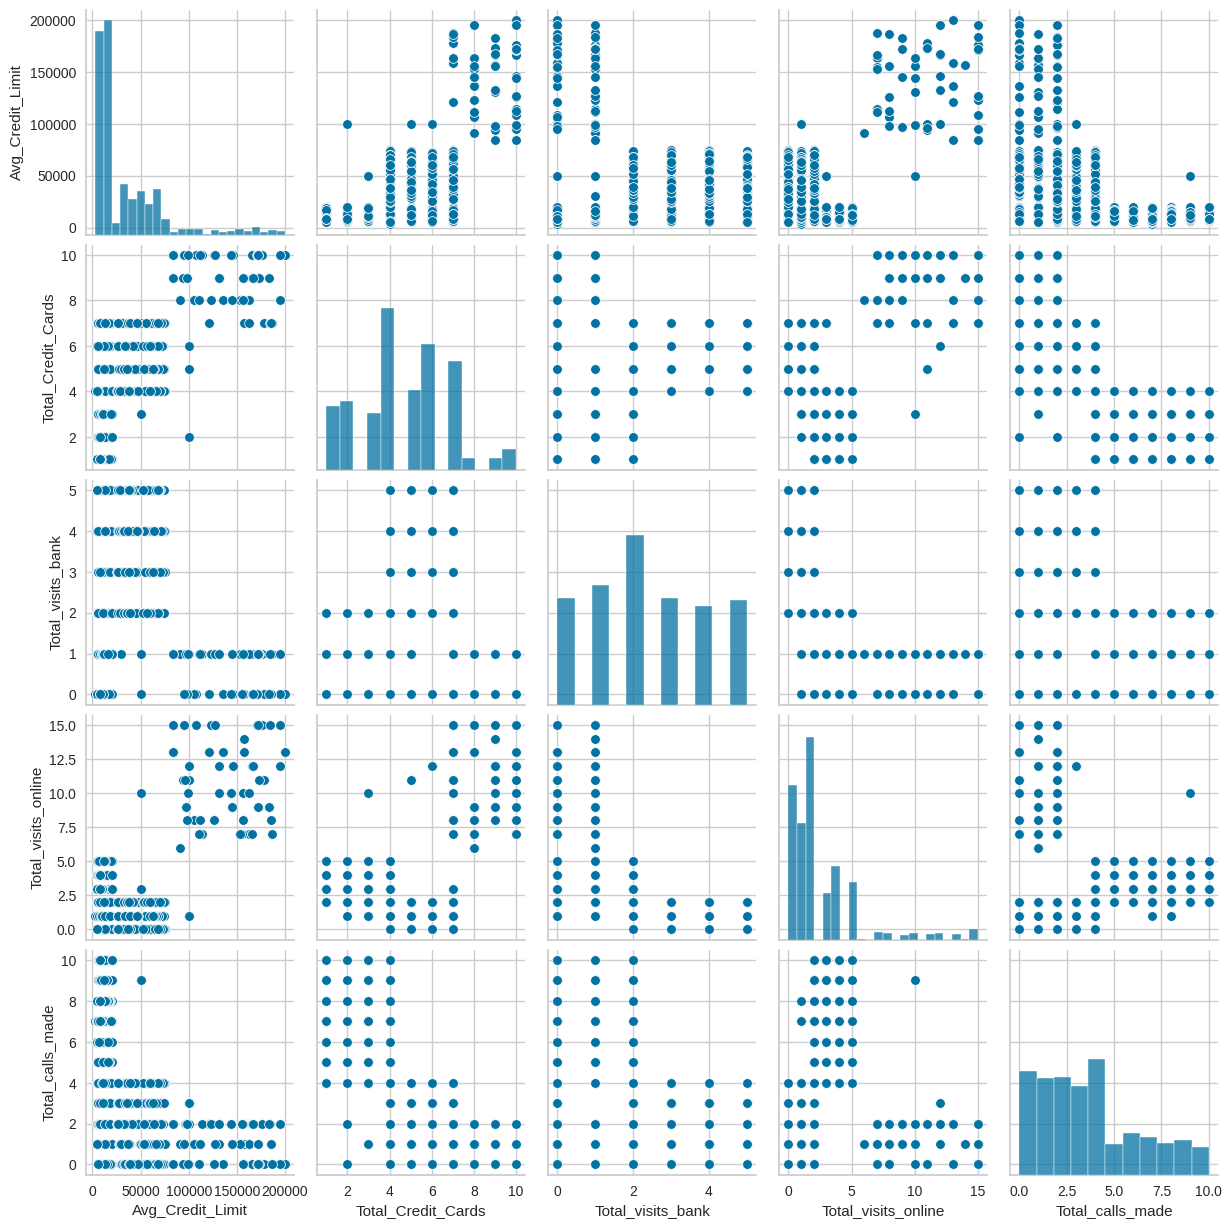

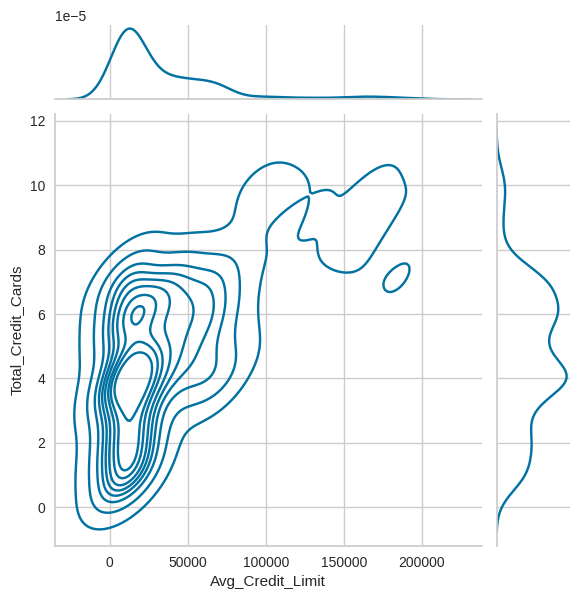

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Avg_Credit_Limit', y='Total_Credit_Cards', hue='Total_visits_bank')
plt.title('Avg Credit Limit vs Total Credit Cards colored by Total Bank Visits')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total_visits_bank', y='Total_visits_online', hue='Total_calls_made')
plt.title('Total Bank Visits vs Total Online Visits colored by Total Calls Made')
plt.show()
# Pairplot to visualize relationships between multiple numerical variables
sns.pairplot(data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])
plt.show()
# Jointplot to visualize the relationship between two variables along with their distributions
sns.jointplot(data=data, x='Avg_Credit_Limit', y='Total_Credit_Cards', kind='kde')
plt.show()

## Data Preprocessing

### Outlier Check

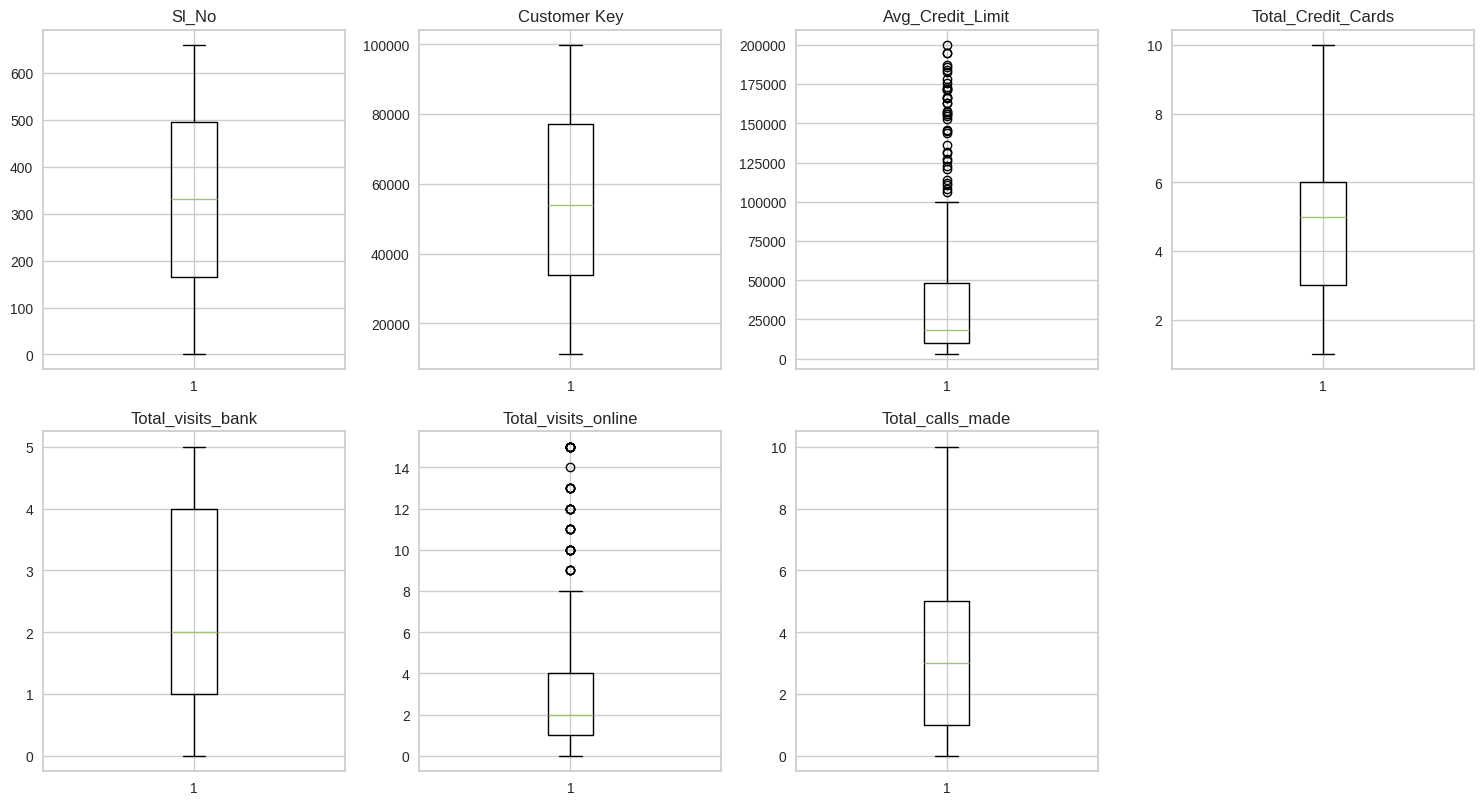

In [20]:
plt.figure(figsize=(15, 12))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [21]:
for col in ['Total_visits_online', 'Avg_Credit_Limit']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the upper or lower bound
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

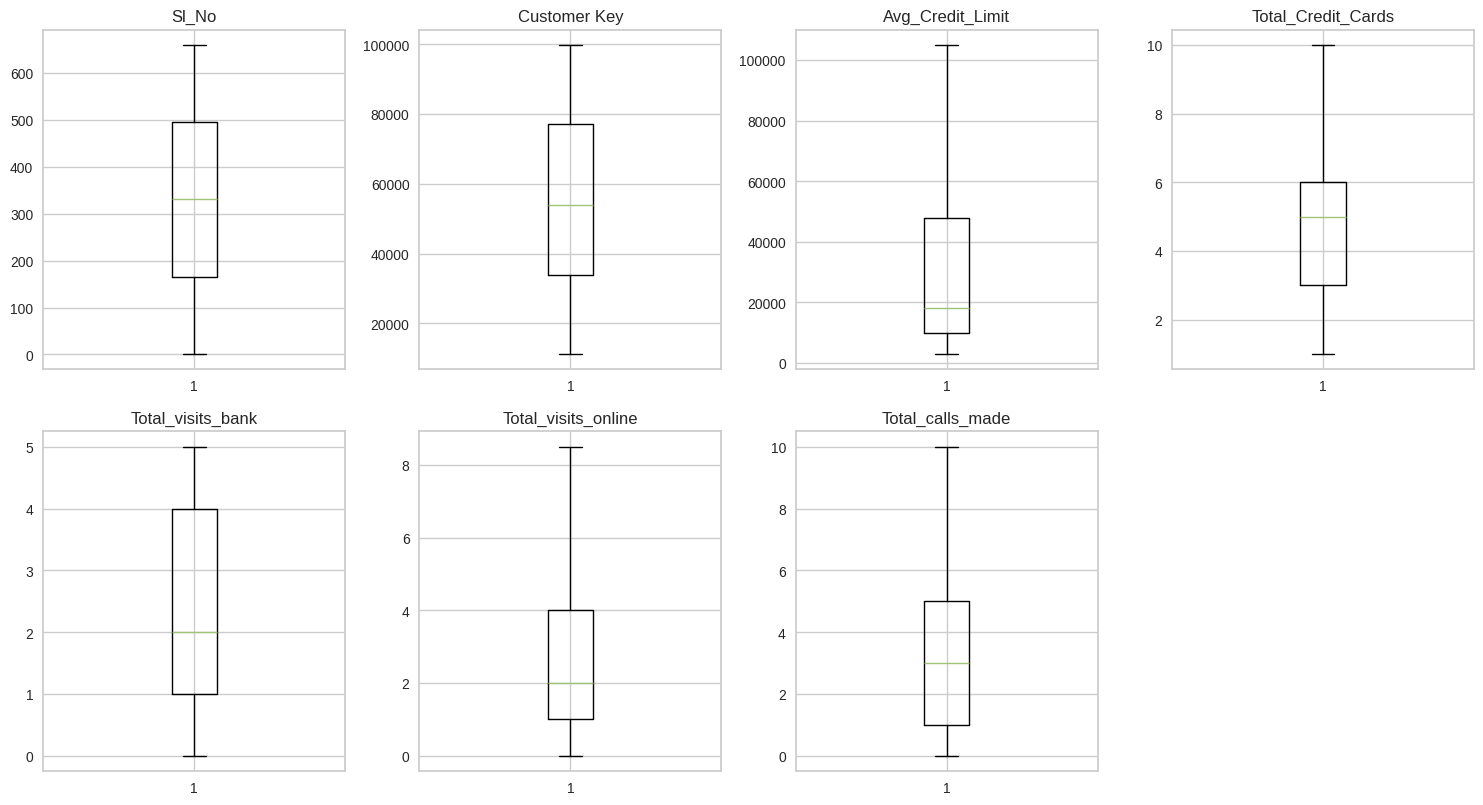

In [22]:
# Outlier check after treatment
plt.figure(figsize=(15, 12))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5) # Use the 'data' DataFrame here
    plt.tight_layout()
    plt.title(variable)

plt.show()

Feature Engineering

In [23]:
# Create interaction features
data['Total_Interactions'] = data['Total_visits_bank'] + data['Total_visits_online'] + data['Total_calls_made']
data['Online_Interaction_Ratio'] = data['Total_visits_online'] / data['Total_Interactions']
data['Bank_Interaction_Ratio'] = data['Total_visits_bank'] / data['Total_Interactions']
# Credit Limit to Number of Cards Ratio
data['Credit_Card_Ratio'] = data['Avg_Credit_Limit'] / data['Total_Credit_Cards']
# Total_Interactions: Captures the overall engagement level of a customer across different channels.
# Online_Interaction_Ratio and Bank_Interaction_Ratio: Provide insights into preferred channels.
# Credit_Card_Ratio: Shows the average credit limit per card, potentially reflecting spending patterns.
print(data.head())

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073          100000.0                   2   
1      2         38414           50000.0                   3   
2      3         17341           50000.0                   7   
3      4         40496           30000.0                   5   
4      5         47437          100000.0                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  \
0                  1                  1.0                 0   
1                  0                  8.5                 9   
2                  1                  3.0                 4   
3                  1                  1.0                 4   
4                  0                  8.5                 3   

   Total_Interactions  Online_Interaction_Ratio  Bank_Interaction_Ratio  \
0                 2.0                  0.500000                0.500000   
1                17.5                  0.485714                0.000000   
2          

### Scaling

In [24]:
# Select features for scaling
features_to_scale = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'Total_Interactions', 'Online_Interaction_Ratio', 'Bank_Interaction_Ratio', 'Credit_Card_Ratio']
# Scale the selected features using StandardScaler
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
print(data.head())

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073          2.398942           -1.249225   
1      2         38414          0.643619           -0.787585   
2      3         17341          0.643619            1.058973   
3      4         40496         -0.058511            0.135694   
4      5         47437          2.398942            0.597334   

   Total_visits_bank  Total_visits_online  Total_calls_made  \
0          -0.860451            -0.619767         -1.251537   
1          -1.473731             2.705813          1.891859   
2          -0.860451             0.267054          0.145528   
3          -0.860451            -0.619767          0.145528   
4          -1.473731             2.705813         -0.203739   

   Total_Interactions  Online_Interaction_Ratio  Bank_Interaction_Ratio  \
0           -2.032908                  1.118397                0.472093   
1            2.902811                  1.052764               -1.274343   
2          

In [25]:
scaled_features_df = pd.DataFrame(data[features_to_scale])
print(scaled_features_df.head())

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          2.398942           -1.249225          -0.860451   
1          0.643619           -0.787585          -1.473731   
2          0.643619            1.058973          -0.860451   
3         -0.058511            0.135694          -0.860451   
4          2.398942            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  Total_Interactions  \
0            -0.619767         -1.251537           -2.032908   
1             2.705813          1.891859            2.902811   
2             0.267054          0.145528           -0.122307   
3            -0.619767          0.145528           -0.759174   
4             2.705813         -0.203739            0.992210   

   Online_Interaction_Ratio  Bank_Interaction_Ratio  Credit_Card_Ratio  
0                  1.118397                0.472093           8.936352  
1                  1.052764               -1.274343           2.031639  
2                  0.54

## K-means Clustering

### Checking Elbow Plot

In [26]:
k_means_df = scaled_features_df.copy()


Number of Clusters: 1 	Average Distortion: 2.8006836018483305
Number of Clusters: 2 	Average Distortion: 2.143820620079126
Number of Clusters: 3 	Average Distortion: 1.7441355019979334
Number of Clusters: 4 	Average Distortion: 1.6788658018487856
Number of Clusters: 5 	Average Distortion: 1.5109991098296305
Number of Clusters: 6 	Average Distortion: 1.438937264761613
Number of Clusters: 7 	Average Distortion: 1.3730167394627355
Number of Clusters: 8 	Average Distortion: 1.3292512999945292
Number of Clusters: 9 	Average Distortion: 1.2773501722217167
Number of Clusters: 10 	Average Distortion: 1.245990931734834
Number of Clusters: 11 	Average Distortion: 1.2325819094234907
Number of Clusters: 12 	Average Distortion: 1.2043882179615784
Number of Clusters: 13 	Average Distortion: 1.184658290275061
Number of Clusters: 14 	Average Distortion: 1.1646561396303545


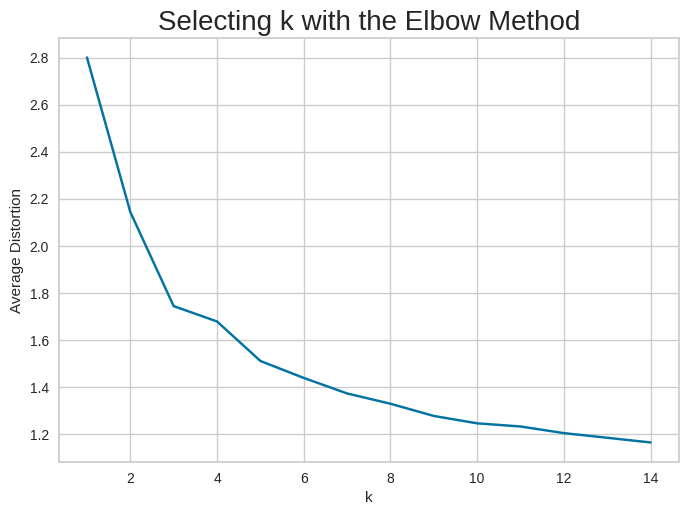

In [27]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(scaled_features_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

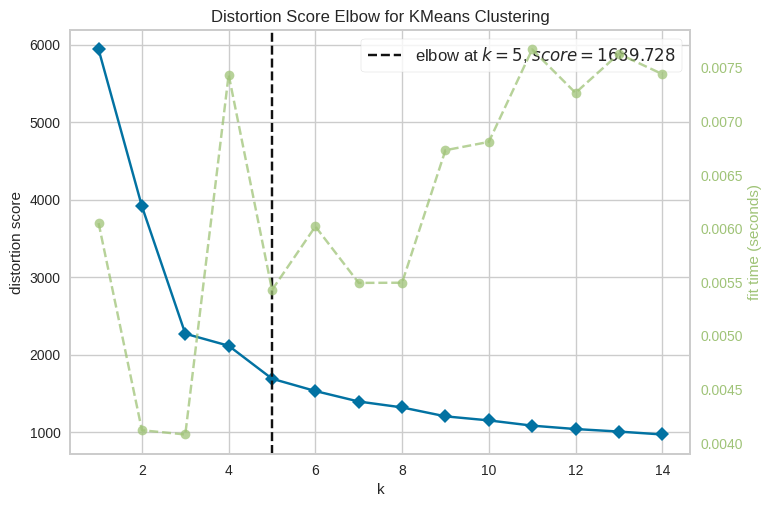

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

The silhouette scores

For n_clusters = 2, the silhouette score is 0.36268021687918073)
For n_clusters = 3, the silhouette score is 0.46422730454464656)
For n_clusters = 4, the silhouette score is 0.3628725234274723)
For n_clusters = 5, the silhouette score is 0.29214695707228716)
For n_clusters = 6, the silhouette score is 0.2594166496779056)
For n_clusters = 7, the silhouette score is 0.25966812647967563)
For n_clusters = 8, the silhouette score is 0.24454383606619223)
For n_clusters = 9, the silhouette score is 0.24953411624341632)
For n_clusters = 10, the silhouette score is 0.24847359806915711)
For n_clusters = 11, the silhouette score is 0.24988125477114534)
For n_clusters = 12, the silhouette score is 0.2369430018467453)
For n_clusters = 13, the silhouette score is 0.23941011672517806)
For n_clusters = 14, the silhouette score is 0.22995453606126606)


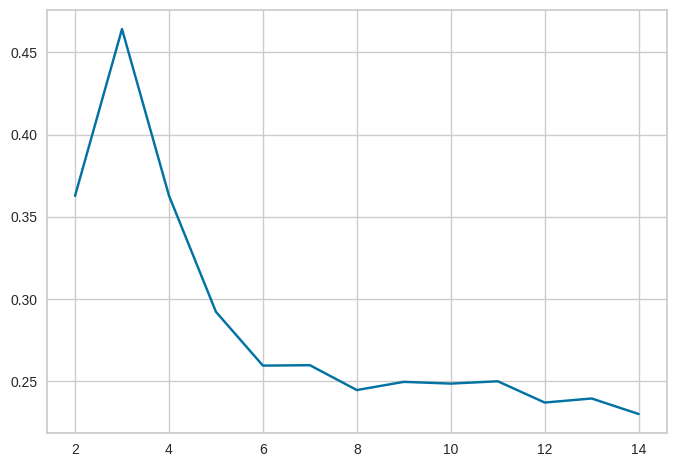

In [29]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((scaled_features_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

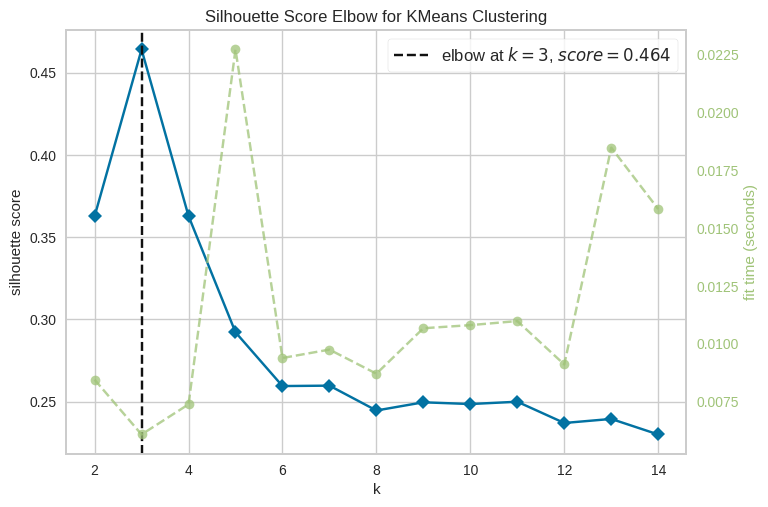

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [30]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

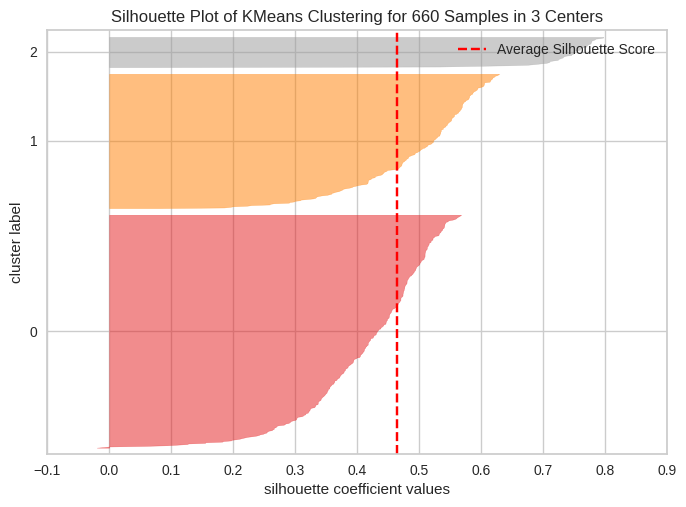

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

In [32]:
# final K-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [33]:
# creating a copy of the original data
data1 = data.copy()
# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
data1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [34]:
numeric_data1 = data1.select_dtypes(include='number')

km_cluster_profile = numeric_data1.groupby("KM_segments").mean()

In [35]:
km_cluster_profile["count_in_each_segment"] = (
    data1.groupby("KM_segments")["Customer Key"].count().values
)

In [36]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Interactions,Online_Interaction_Ratio,Bank_Interaction_Ratio,Credit_Card_Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,417.546632,54752.580311,0.066545,0.374886,0.664806,-0.627808,-0.552100,-0.609032,-0.504650,0.708446,-0.108192,386
1,118.349776,55319.937220,-0.684760,-1.060843,-0.898953,0.514609,1.157303,0.957939,0.269934,-0.989450,-0.093805,223
2,599.313725,57304.137255,2.490494,1.801217,-1.100953,2.501497,-0.881726,0.420903,2.639205,-1.035543,1.229034,51


In [37]:
for cl in data1["KM_segments"].unique():
    print("In cluster {}, the following  are present:".format(cl))
    print(data1[data1["KM_segments"] == cl]["Customer Key"].unique())
    print()

In cluster 2, the following  are present:
[87073 47437 48370 94391 50598 40019 77910 89832 98216 54495 47650 32107
 84192 53916 32584 97285 20337 15585 20620 75009 76203 33837 14916 97935
 16180 49493 70974 40217 88442 17538 90839 99843 27212 91575 60190 18519
 48762 58392 79953 13315 30570 78996 78404 28525 51826 65750 51108 60732
 53834 80655 80150]

In cluster 1, the following  are present:
[38414 58634 82490 44770 52741 52326 92503 25084 68517 55196 62617 96463
 39137 14309 29794 87241 30507 61061 24001 68067 65034 14854 81130 29112
 13999 32550 82164 61517 28254 30888 46388 74126 52142 37659 83132 20119
 52363 50769 68502 99026 83326 62040 37252 74625 51182 60301 96386 43886
 78503 68419 32828 17937 71632 81566 29759 36929 70248 91673 61355 60403
 85868 76205 66524 69214 21976 35149 27120 18821 33187 93482 90168 71881
 59656 12026 99589 38970 57990 39447 79694 79403 47296 37559 38165 49198
 18007 59619 37016 91099 74704 25742 11937 52736 88338 18916 92501 96213
 26599 73007 97935 

In [38]:
# Define bins for 'Avg_Credit_Limit' (adjust as needed)
bins = [0, 10000, 25000, 50000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column with credit limit categories
data1['Credit_Limit_Group'] = pd.cut(data1['Avg_Credit_Limit'], bins=bins, labels=labels)

# Group by 'KM_segments' and 'Credit_Limit_Group'
data1.groupby(["KM_segments", "Credit_Limit_Group"])['Customer Key'].count()

KM_segments  Credit_Limit_Group
0            Low                   191
             Medium                  0
             High                    0
             Very High               0
1            Low                     1
             Medium                  0
             High                    0
             Very High               0
2            Low                    51
             Medium                  0
             High                    0
             Very High               0
Name: Customer Key, dtype: int64

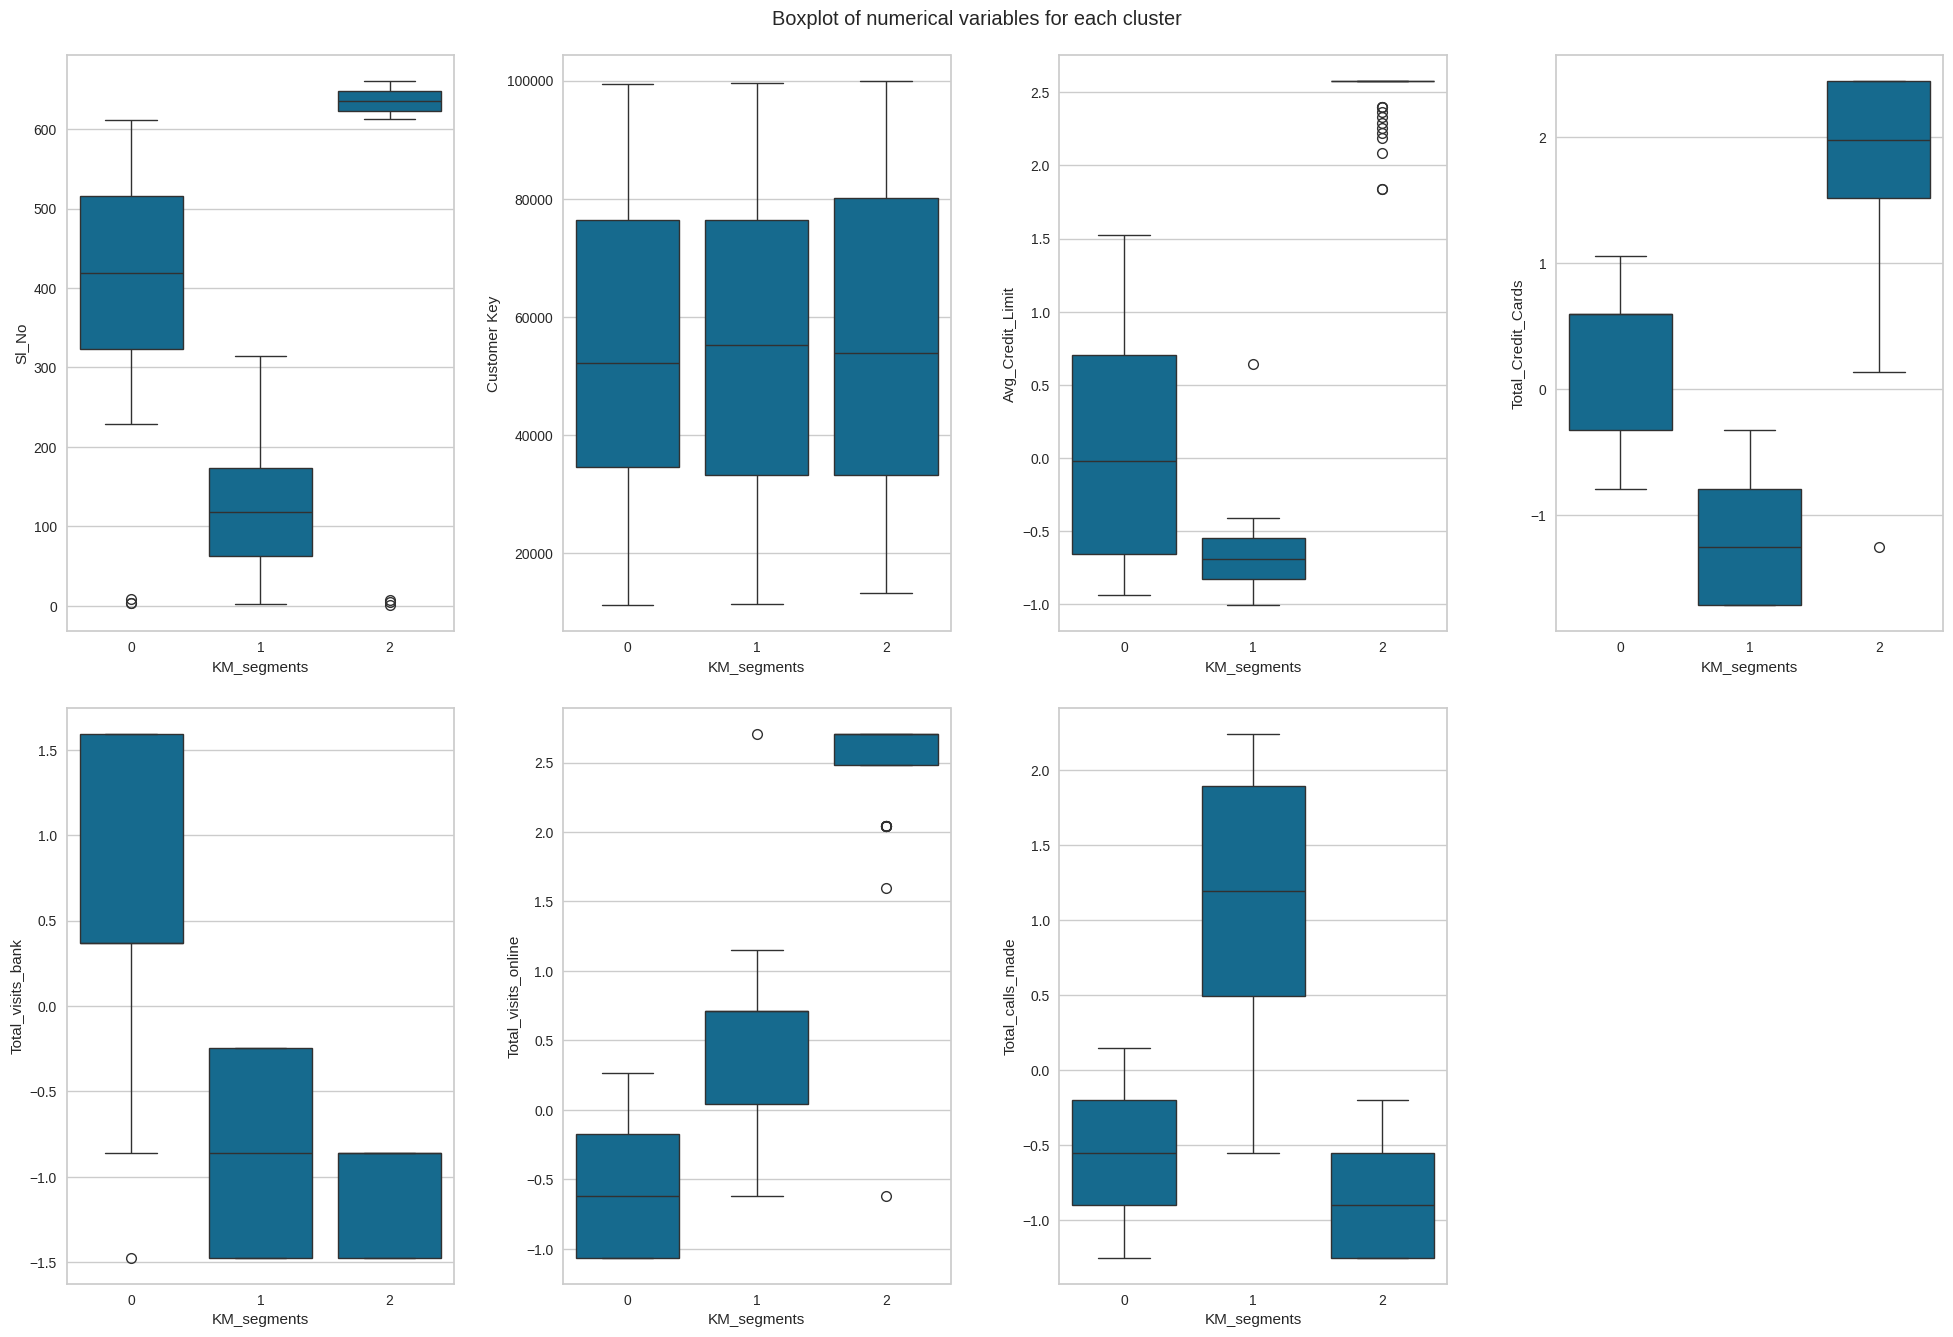

In [39]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [40]:
hc_df = scaled_features_df.copy()

In [41]:
# list of distance metrics
distance_metrics = ['euclidean', 'cityblock', 'cosine', 'jaccard']

# list of linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        # Use 'euclidean' metric when linkage method is 'ward'
        if lm == 'ward':
            Z = linkage(hc_df, metric='euclidean', method=lm)
        else:
            Z = linkage(hc_df, metric=dm, method=lm)

        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and ward linkage is 0.7288868837891113.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7601517612011326.
Cophenetic correlation for Euclidean distance and average linkage is 0.860372998168887.
Cophenetic correlation for Euclidean distance and single linkage is 0.6499141988391343.
Cophenetic correlation for Cityblock distance and ward linkage is 0.7288868837891113.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7013531542064176.
Cophenetic correlation for Cityblock distance and average linkage is 0.851310562291001.
Cophenetic correlation for Cityblock distance and single linkage is 0.6481894583783068.
Cophenetic correlation for Cosine distance and ward linkage is 0.7288868837891113.
Cophenetic correlation for Cosine distance and complete linkage is 0.5407359766945398.
Cophenetic correlation for Cosine distance and average linkage is 0.6963178867827734.
Cophenetic correlation for Cosine distan

In [42]:
# list of linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for ward linkage is 0.7288868837891113.
Cophenetic correlation for complete linkage is 0.7601517612011326.
Cophenetic correlation for average linkage is 0.860372998168887.
Cophenetic correlation for single linkage is 0.6499141988391343.
****************************************************************************************************
Highest cophenetic correlation is 0.860372998168887, which is obtained with average linkage.


### Checking Dendrograms

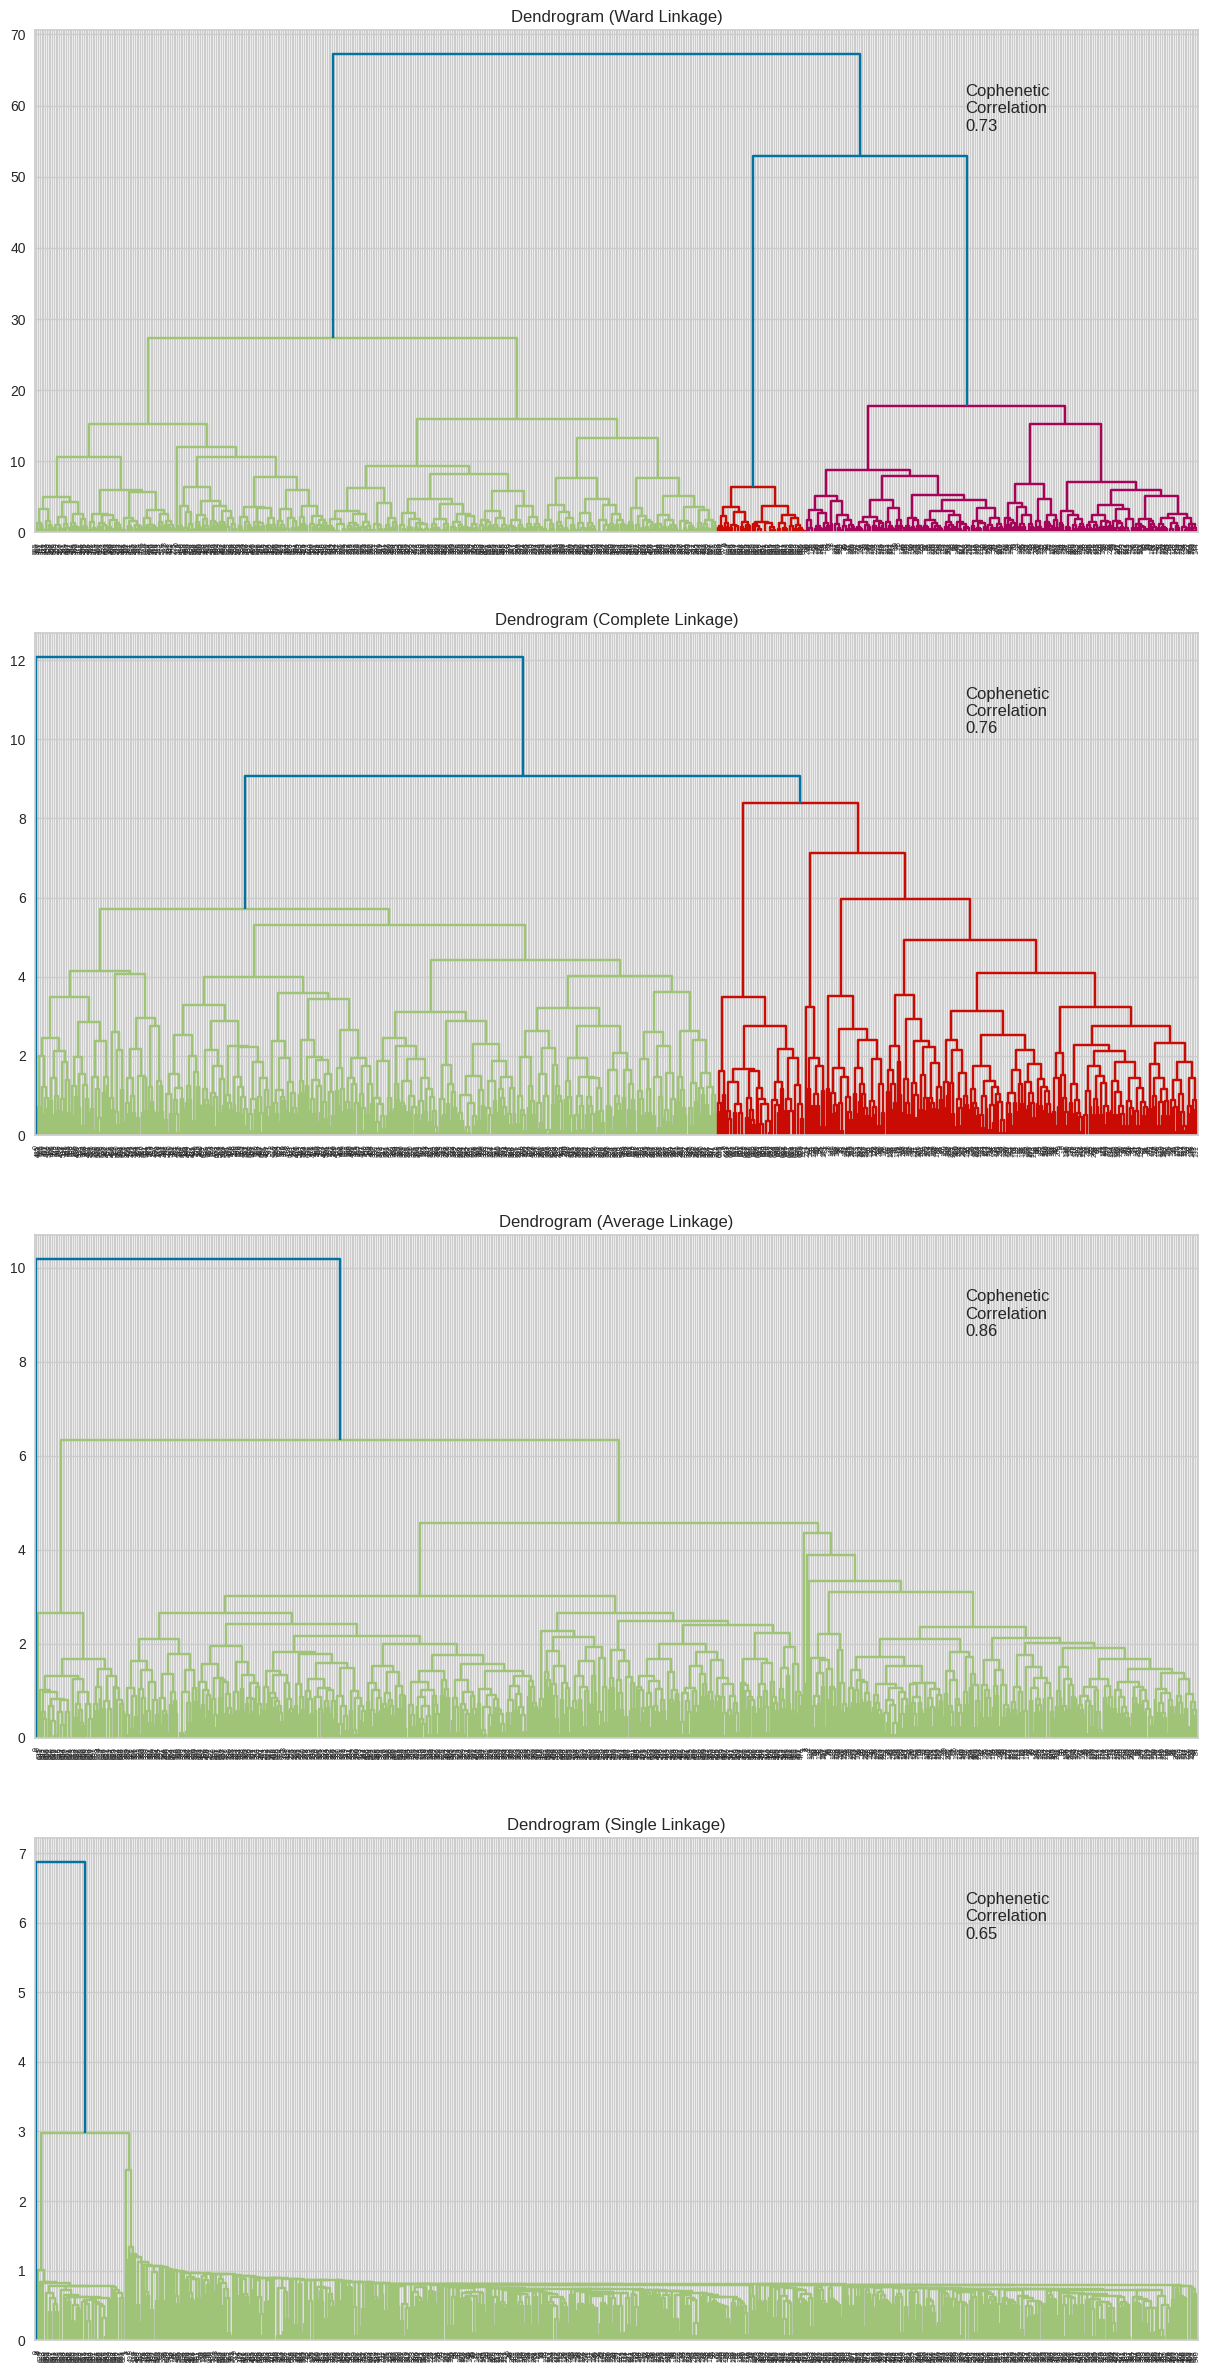

In [43]:
# list of linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [44]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
3,single,0.649914
0,ward,0.728887
1,complete,0.760152
2,average,0.860373


### Creating model using sklearn

In [45]:
HCmodel = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=3)

In [46]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [47]:
numeric_df2 = df2.select_dtypes(include=['number'])

hc_cluster_profile = numeric_df2.groupby("HC_segments").mean()

In [48]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Customer Key"].count().values
)

In [49]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,,,
0,417.260982,54925.966408,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,116.977578,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408,223
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [50]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Customer Key"].unique())
    print()

In cluster 0, the following companies are present:
[87073 17341 40496 54838 35254 46635 97825 83125 35483 15129 83290 56486
 31903 45909 14263 46813 81878 35549 85799 39122 81531 69965 18595 44398
 32352 40898 27101 33457 45088 23302 27408 65372 21531 56843 17165 89328
 20072 71402 47496 24808 17036 67193 34423 97109 55382 51811 53936 66504
 53207 18514 51319 36340 36934 95925 49771 22919 21233 74544 52025 45652
 73952 49418 77026 49331 75775 54906 94666 11698 34677 95610 41380 38033
 85337 38994 67911 92956 77641 57565 53814 30712 19785 31384 16374 50878
 78002 83459 91987 51552 72156 24998 45673 11596 87485 28414 81863 33240
 11466 23881 44645 49844 92782 22824 26767 26678 50412 17933 34495 47437
 22610 41159 64672 62483 85614 96548 19137 69028 70779 38244 67046 64897
 46223 36628 17565 77381 11799 81940 66706 87838 94437 33790 44402 29886
 66804 47866 61996 15318 89635 71681 71862 96186 22348 36243 88807 82376
 98126 80347 17649 62807 92522 57459 44579 45476 61994 11398 24702 27824


In [51]:
# Define bins for 'Avg_Credit_Limit' (adjust as needed)
bins = [0, 10000, 25000, 50000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column with credit limit categories in df2
df2['Credit_Limit_Group'] = pd.cut(df2['Avg_Credit_Limit'], bins=bins, labels=labels)

# Group by 'HC_segments' and 'Credit_Limit_Group'
df2.groupby(["HC_segments", "Credit_Limit_Group"])['Customer Key'].count()

HC_segments  Credit_Limit_Group
0            Low                    71
             Medium                 98
             High                  116
             Very High             102
1            Low                    95
             Medium                127
             High                    1
             Very High               0
2            Low                     0
             Medium                  0
             High                    0
             Very High              50
Name: Customer Key, dtype: int64

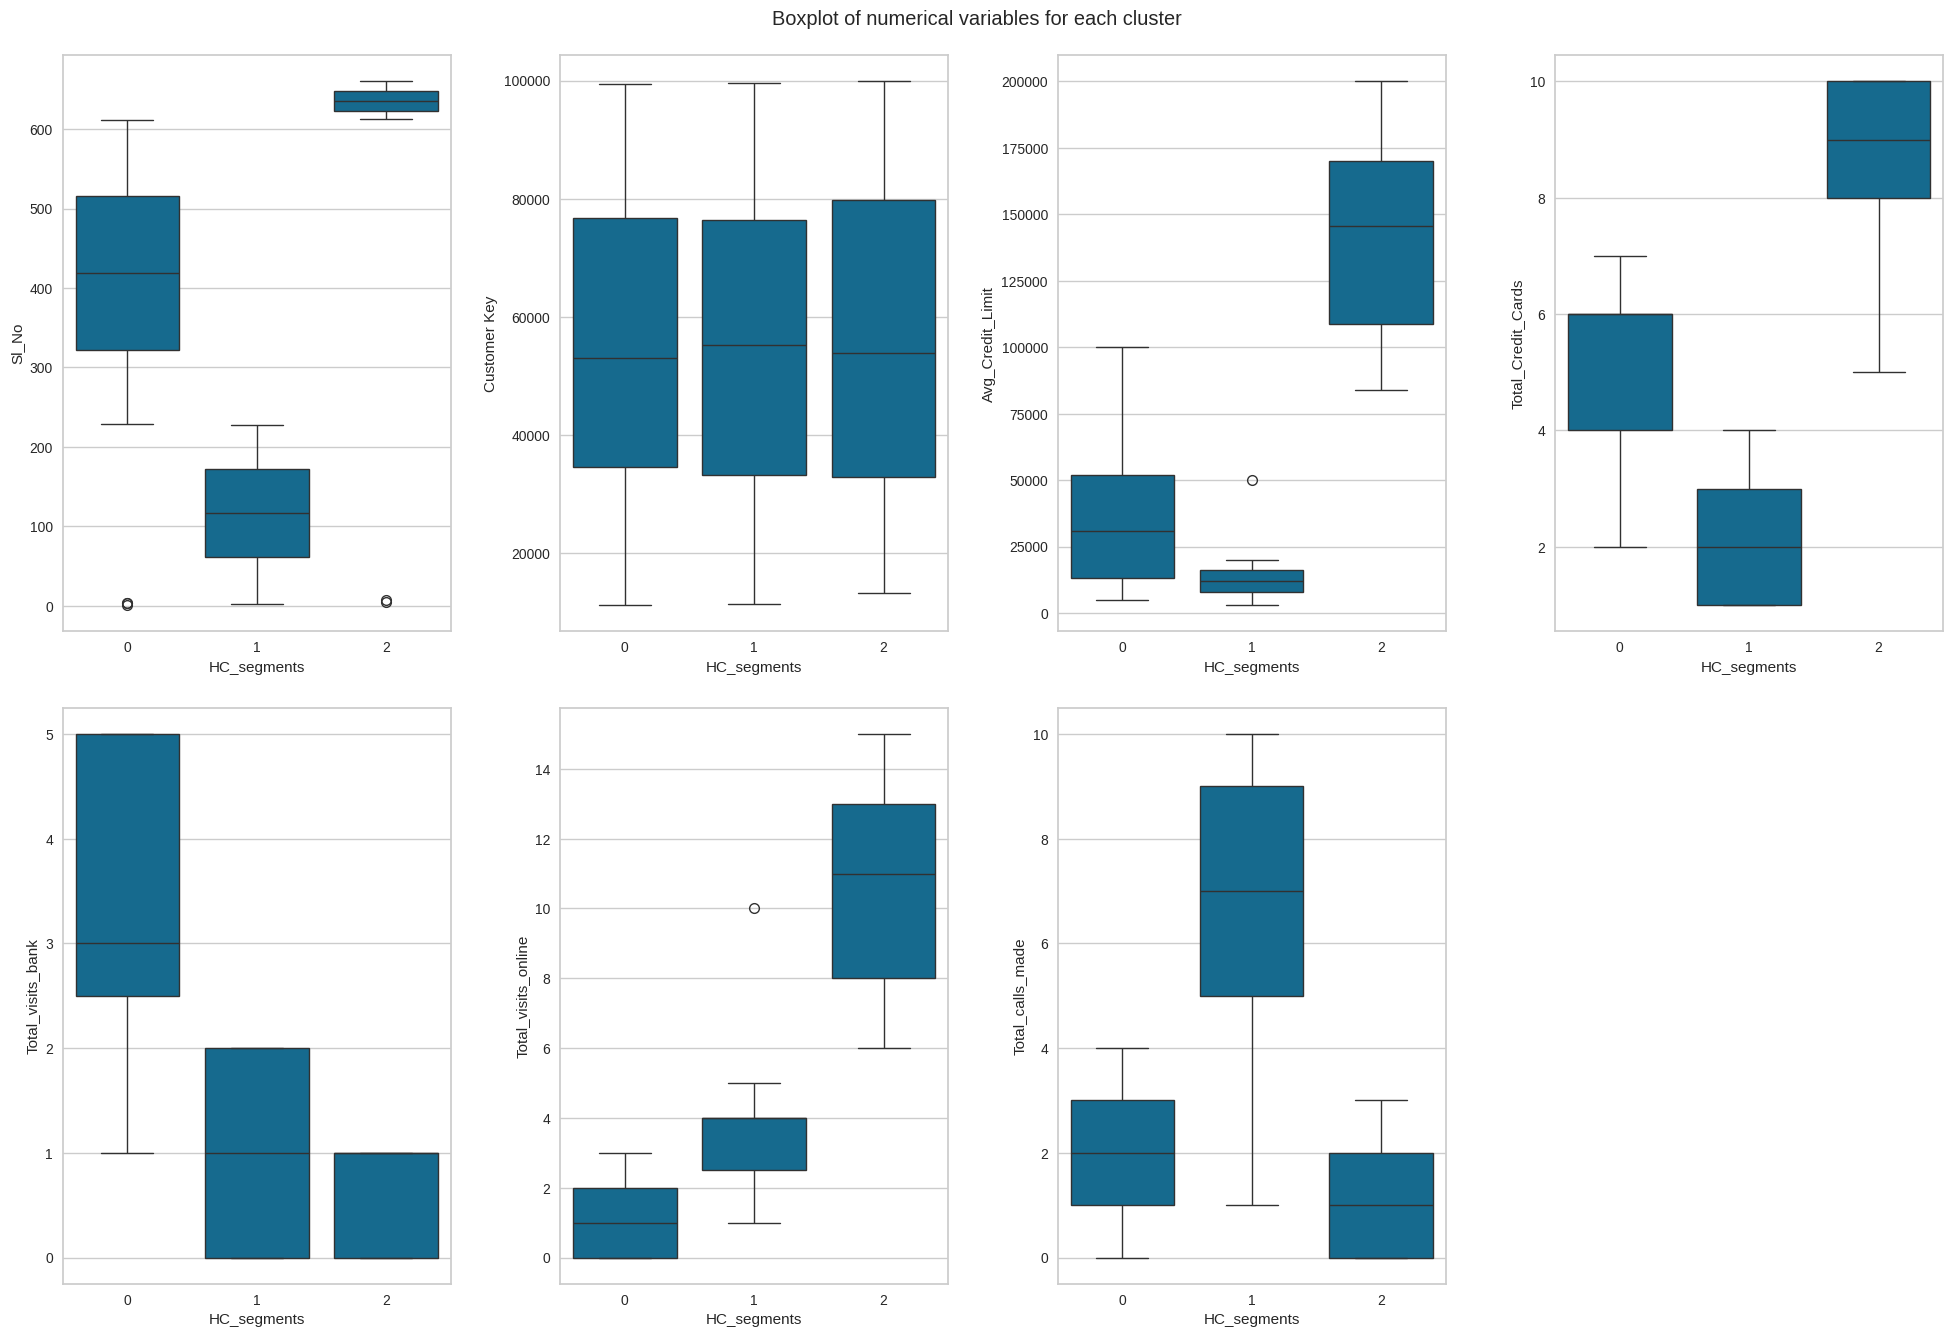

In [52]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

1. Execution Time:
K-means: Generally, K-means is faster and scales better with larger datasets. It typically converges in fewer iterations due to its iterative nature. The time complexity is
𝑂
(
𝑛
⋅
𝑘
⋅
𝑡
)
O(n⋅k⋅t), where
𝑛
n is the number of observations,
𝑘
k is the number of clusters, and
𝑡
t is the number of iterations.

Hierarchical Clustering: Hierarchical clustering is computationally more expensive because it computes a distance matrix, leading to a time complexity of
𝑂
(
𝑛
2
)
O(n
2
 ) in agglomerative hierarchical clustering. It is slower on large datasets compared to K-means.


2. Distinctness of Clusters:
K-means: This algorithm divides the data into a pre-specified number of clusters (K). The clusters it produces are hard, meaning each observation belongs to only one cluster. K-means tends to give more compact and spherical clusters.

Hierarchical Clustering: It does not require specifying the number of clusters upfront. The result is a dendrogram that shows the hierarchy, allowing you to choose the appropriate number of clusters based on the tree structure. Hierarchical clustering can produce clusters that are more varied in shape, and in some cases, it provides more distinct or granular clusters compared to K-means.


3. Similar Clusters Between Both Algorithms:
Cluster Distribution in K-means:
For K-means, the number of clusters is predefined (e.g., 3 clusters in this case).
Cluster Distribution in Hierarchical Clustering:
In hierarchical clustering, clusters are defined by cutting the dendrogram at a particular level. It gives flexibility in determining the number of clusters based on the desired level of granularity.
When comparing the clusters from both methods, you may observe similarities or overlap in the customer distribution. Some observations that fall into the same group in one method may end up in similar groups in the other method.



4. Number of Clusters Obtained:
K-means: The number of clusters is pre-specified, so you must choose an optimal
𝐾
K beforehand. In your case, you can use the elbow method or silhouette score to choose the right
𝐾
K. If you’ve chosen 3 clusters, K-means will force the data into exactly 3 groups.

Hierarchical Clustering: The number of clusters in hierarchical clustering is flexible, as you can adjust it by cutting the dendrogram at different heights. The dendrogram in your example shows that the number of clusters can vary, and you've observed that 3 clusters were chosen from this hierarchy as well.


5. Cluster Profiles Comparison:
Let’s compare the cluster profiles you’ve derived from K-means and hierarchical clustering.

Cluster 0: In both K-means and hierarchical clustering, the first cluster consists of customers with higher credit limits, more bank visits, and higher engagement.

Cluster 1: Both methods identified a cluster with lower engagement and medium credit limits, although the number of customers in each cluster differs slightly. Hierarchical clustering has a slightly lower number of high-credit customers in this cluster.

Cluster 2: The third cluster, composed of customers with very high credit limits, shows similarity in both methods, with high engagement across both platforms. The profiles of these customers are aligned in both K-means and hierarchical clustering.


## Actionable Insights and Recommendations

	Targeted Marketing Campaigns: Cluster 0 (High-Value Customers): These customers have high credit limits, frequent bank visits, and high overall engagement. Focus on premium products and services, exclusive offers, and personalized financial advice. Consider loyalty programs to retain these valuable customers. Cluster 1 (Medium-Value Customers): These customers show moderate engagement and credit limits. Targeted promotions and incentives can encourage increased usage of online banking and other services. Offer products and services that cater to their moderate spending habits and financial goals. Cluster 2 (High-Credit, High-Engagement Customers): These customers have very high credit limits and are highly engaged. Offer them exclusive financial products and services, personalized wealth management options, and premium rewards. Prioritize maintaining their satisfaction to reduce churn risk.
	Customer Service Optimization: Cluster 0 (High-Value Customers): Provide dedicated customer service channels and priority support to ensure quick resolution of issues. Proactive outreach to understand their financial needs and provide personalized guidance. Cluster 1 (Medium-Value Customers): Offer convenient online support channels and self-service options to cater to their moderate engagement. Address any pain points in the online banking or service experience to improve engagement. Cluster 2 (High-Credit, High-Engagement Customers): Provide dedicated wealth management consultants or personalized financial advisors to cater to their unique needs. Ensure that high-touch customer service is available for complex financial inquiries.
	Product Development: Analyze the specific needs of each cluster to identify product gaps and develop new offerings tailored to their profiles. For example, Cluster 0 might benefit from premium credit cards or investment products, while Cluster 1 might benefit from user-friendly financial planning tools or educational resources.
	Channel Optimization: Analyze the interaction patterns of each cluster to understand their preferred channels (online vs. bank visits vs. phone calls). Optimize resources and service offerings based on these preferences. For instance, encourage customers in Cluster 1 to use online banking more often through incentives, improving the user experience, and offering online-only discounts.
	Risk Management: Monitor the credit limit utilization and spending patterns of each cluster. Implement appropriate risk management measures based on the identified patterns to minimize potential risks.
	Customer Segmentation Refinement: Periodically re-evaluate customer segmentation using updated data to ensure the clusters remain relevant and representative. Refine the segmentation criteria based on changing customer behavior and market trends.